In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=20,12
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

In [77]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [78]:
df=pd.read_excel(r'C:\Users\Admin\Desktop\Covid cases in India.xlsx')

In [79]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [80]:
df.drop('S. No.',axis=1,inplace=True)

In [81]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [82]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [83]:
total_cases_overall=df['Total Cases'].sum()
print('The total no. of cases till now in india is',total_cases_overall)

The total no. of cases till now in india is 729


In [84]:
df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])

In [85]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


# To present this data in better way

In [86]:
#Inbuilt feature of pandas called df.style is used here to present the data to clients easily
df.style.background_gradient(cmap='Reds')
#higer the number of cases the color gradient is higher

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [87]:
# to take a look at perticular column
#group by is used to make a group of 2 columns (active cases in perticular states)
#Python allows many different libraries that enable data manipulation. One such library, pandas, has a command
#used to group the dataset by the selected column. It can be used to group large datasets and apply operations on them.
Total_Active_Cases=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False)
Total_Active_Cases

Name of State / UT
Maharashtra          128
Kerala               127
Telengana             44
Rajasthan             40
Gujarat               40
Tamil Nadu            33
Uttar Pradesh         32
Delhi                 32
Punjab                28
Madhya Pradesh        22
Haryana               19
Jammu and Kashmir     16
Karnataka             15
Ladakh                13
Andhra Pradesh        11
West Bengal           10
Chandigarh             7
Goa                    6
Chhattisgarh           6
Bihar                  6
Uttarakhand            4
Himachal Pradesh       3
Odisha                 3
Manipur                1
Mizoram                1
Puducherry             1
Name: Active Cases, dtype: int64

In [88]:
#The to_frame() function is used to convert Series to DataFrame
Total_Active_Cases=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_Cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [89]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# Graphical Representation of Data

#Pandas Visualization

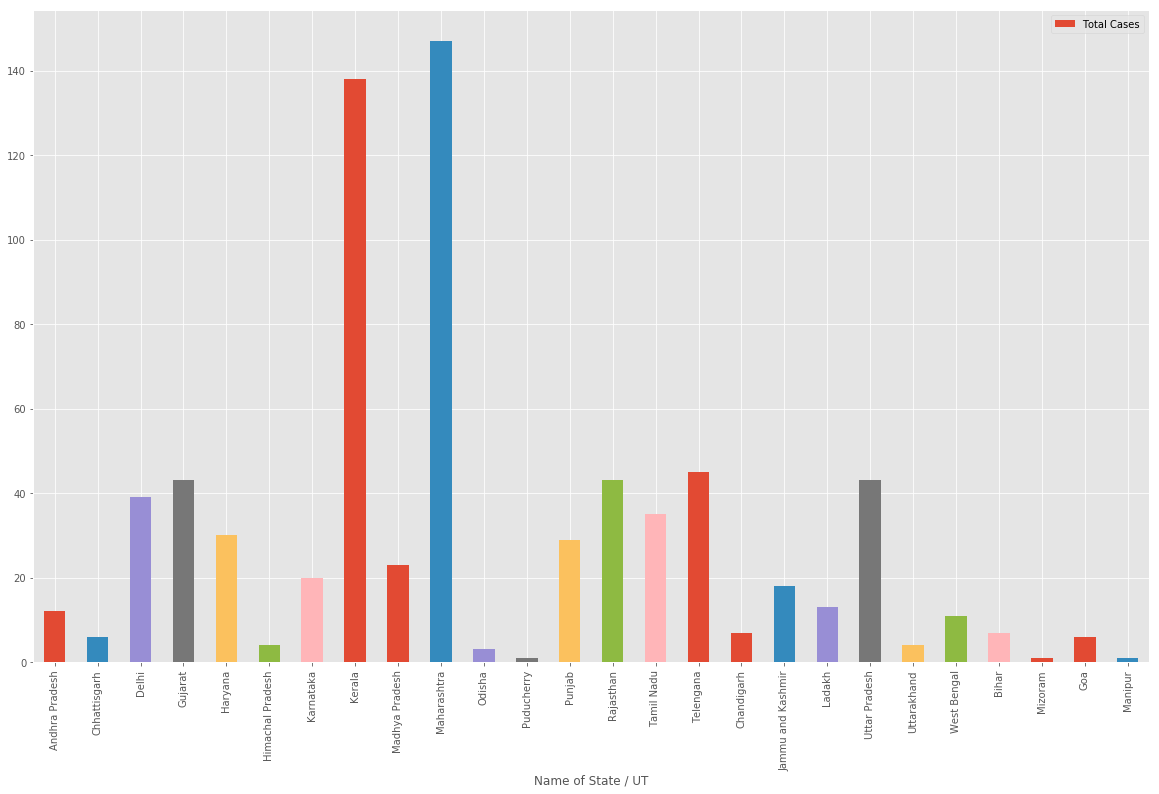

In [90]:
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')

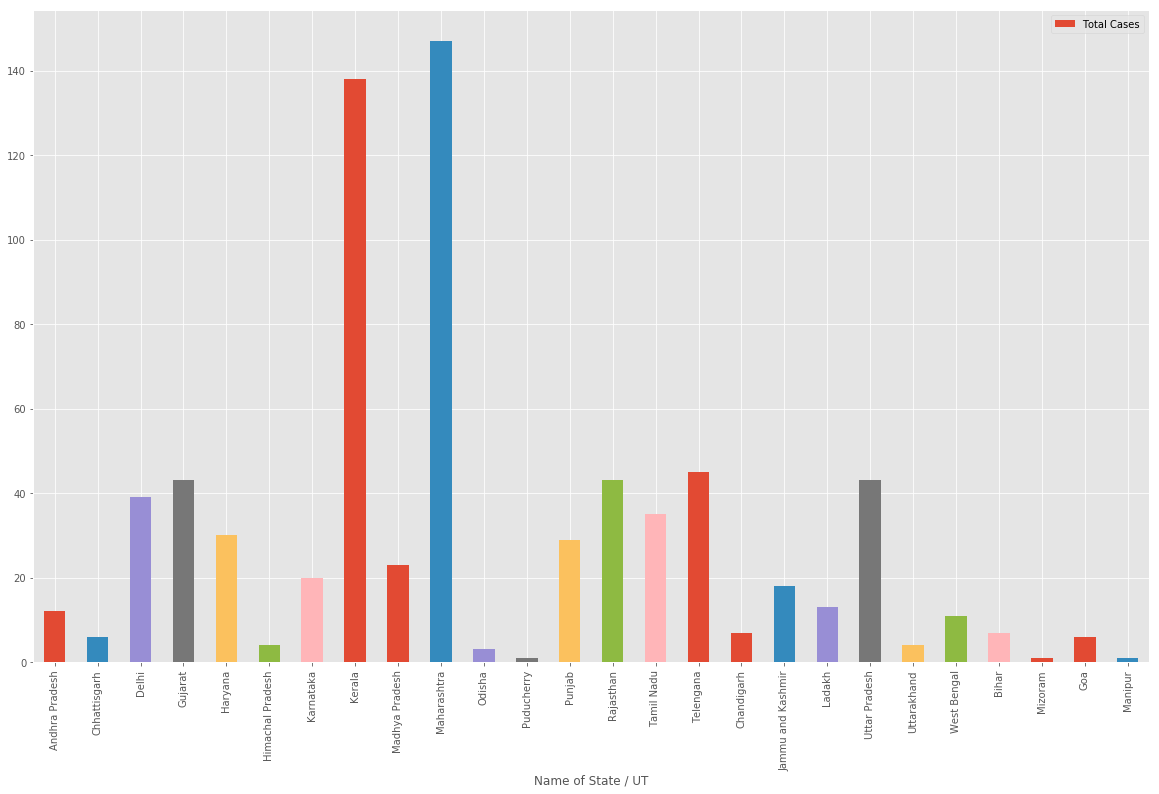

In [91]:
#After using plt.rcParams['figure.figsize']=20,12 to create a bigger graphs
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')

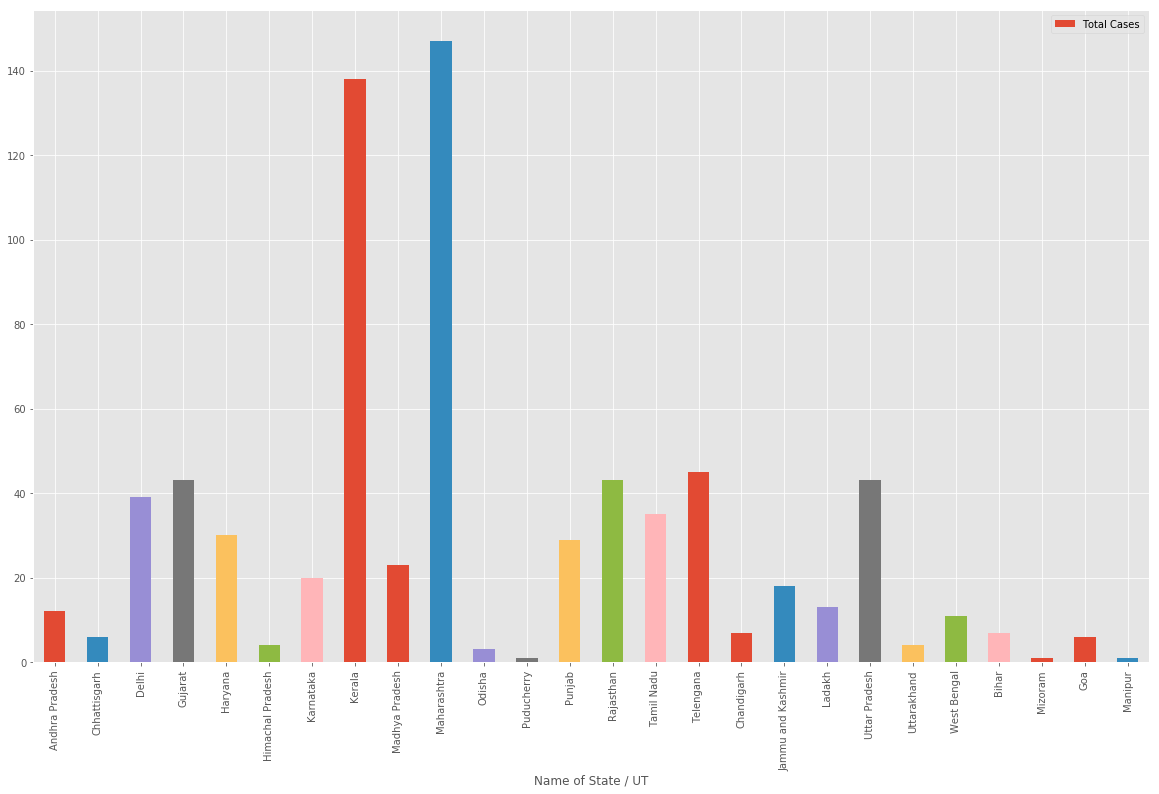

In [92]:
#pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
#plotly visualization
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

In [93]:
px.bar(df,x='Name of State / UT',y='Total Cases')

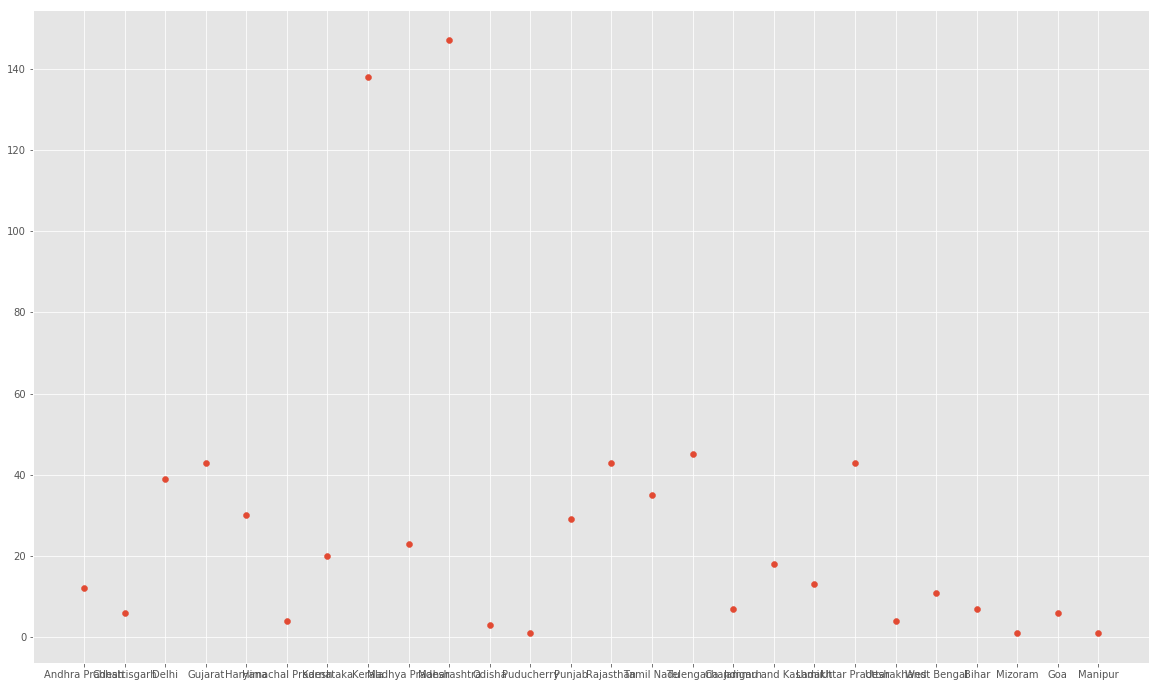

In [94]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])

In [95]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases')

In [96]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines')

In [97]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines')

In [98]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='Graph',xTitle='Name of State/UT',yTitle='Total Cases',colors='red',size=20)

In [99]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='Graph',xTitle='Name of State/UT',yTitle='Total Cases',colors='red',size=20)
px.scatter(df,x='Name of State / UT',y='Total Cases')

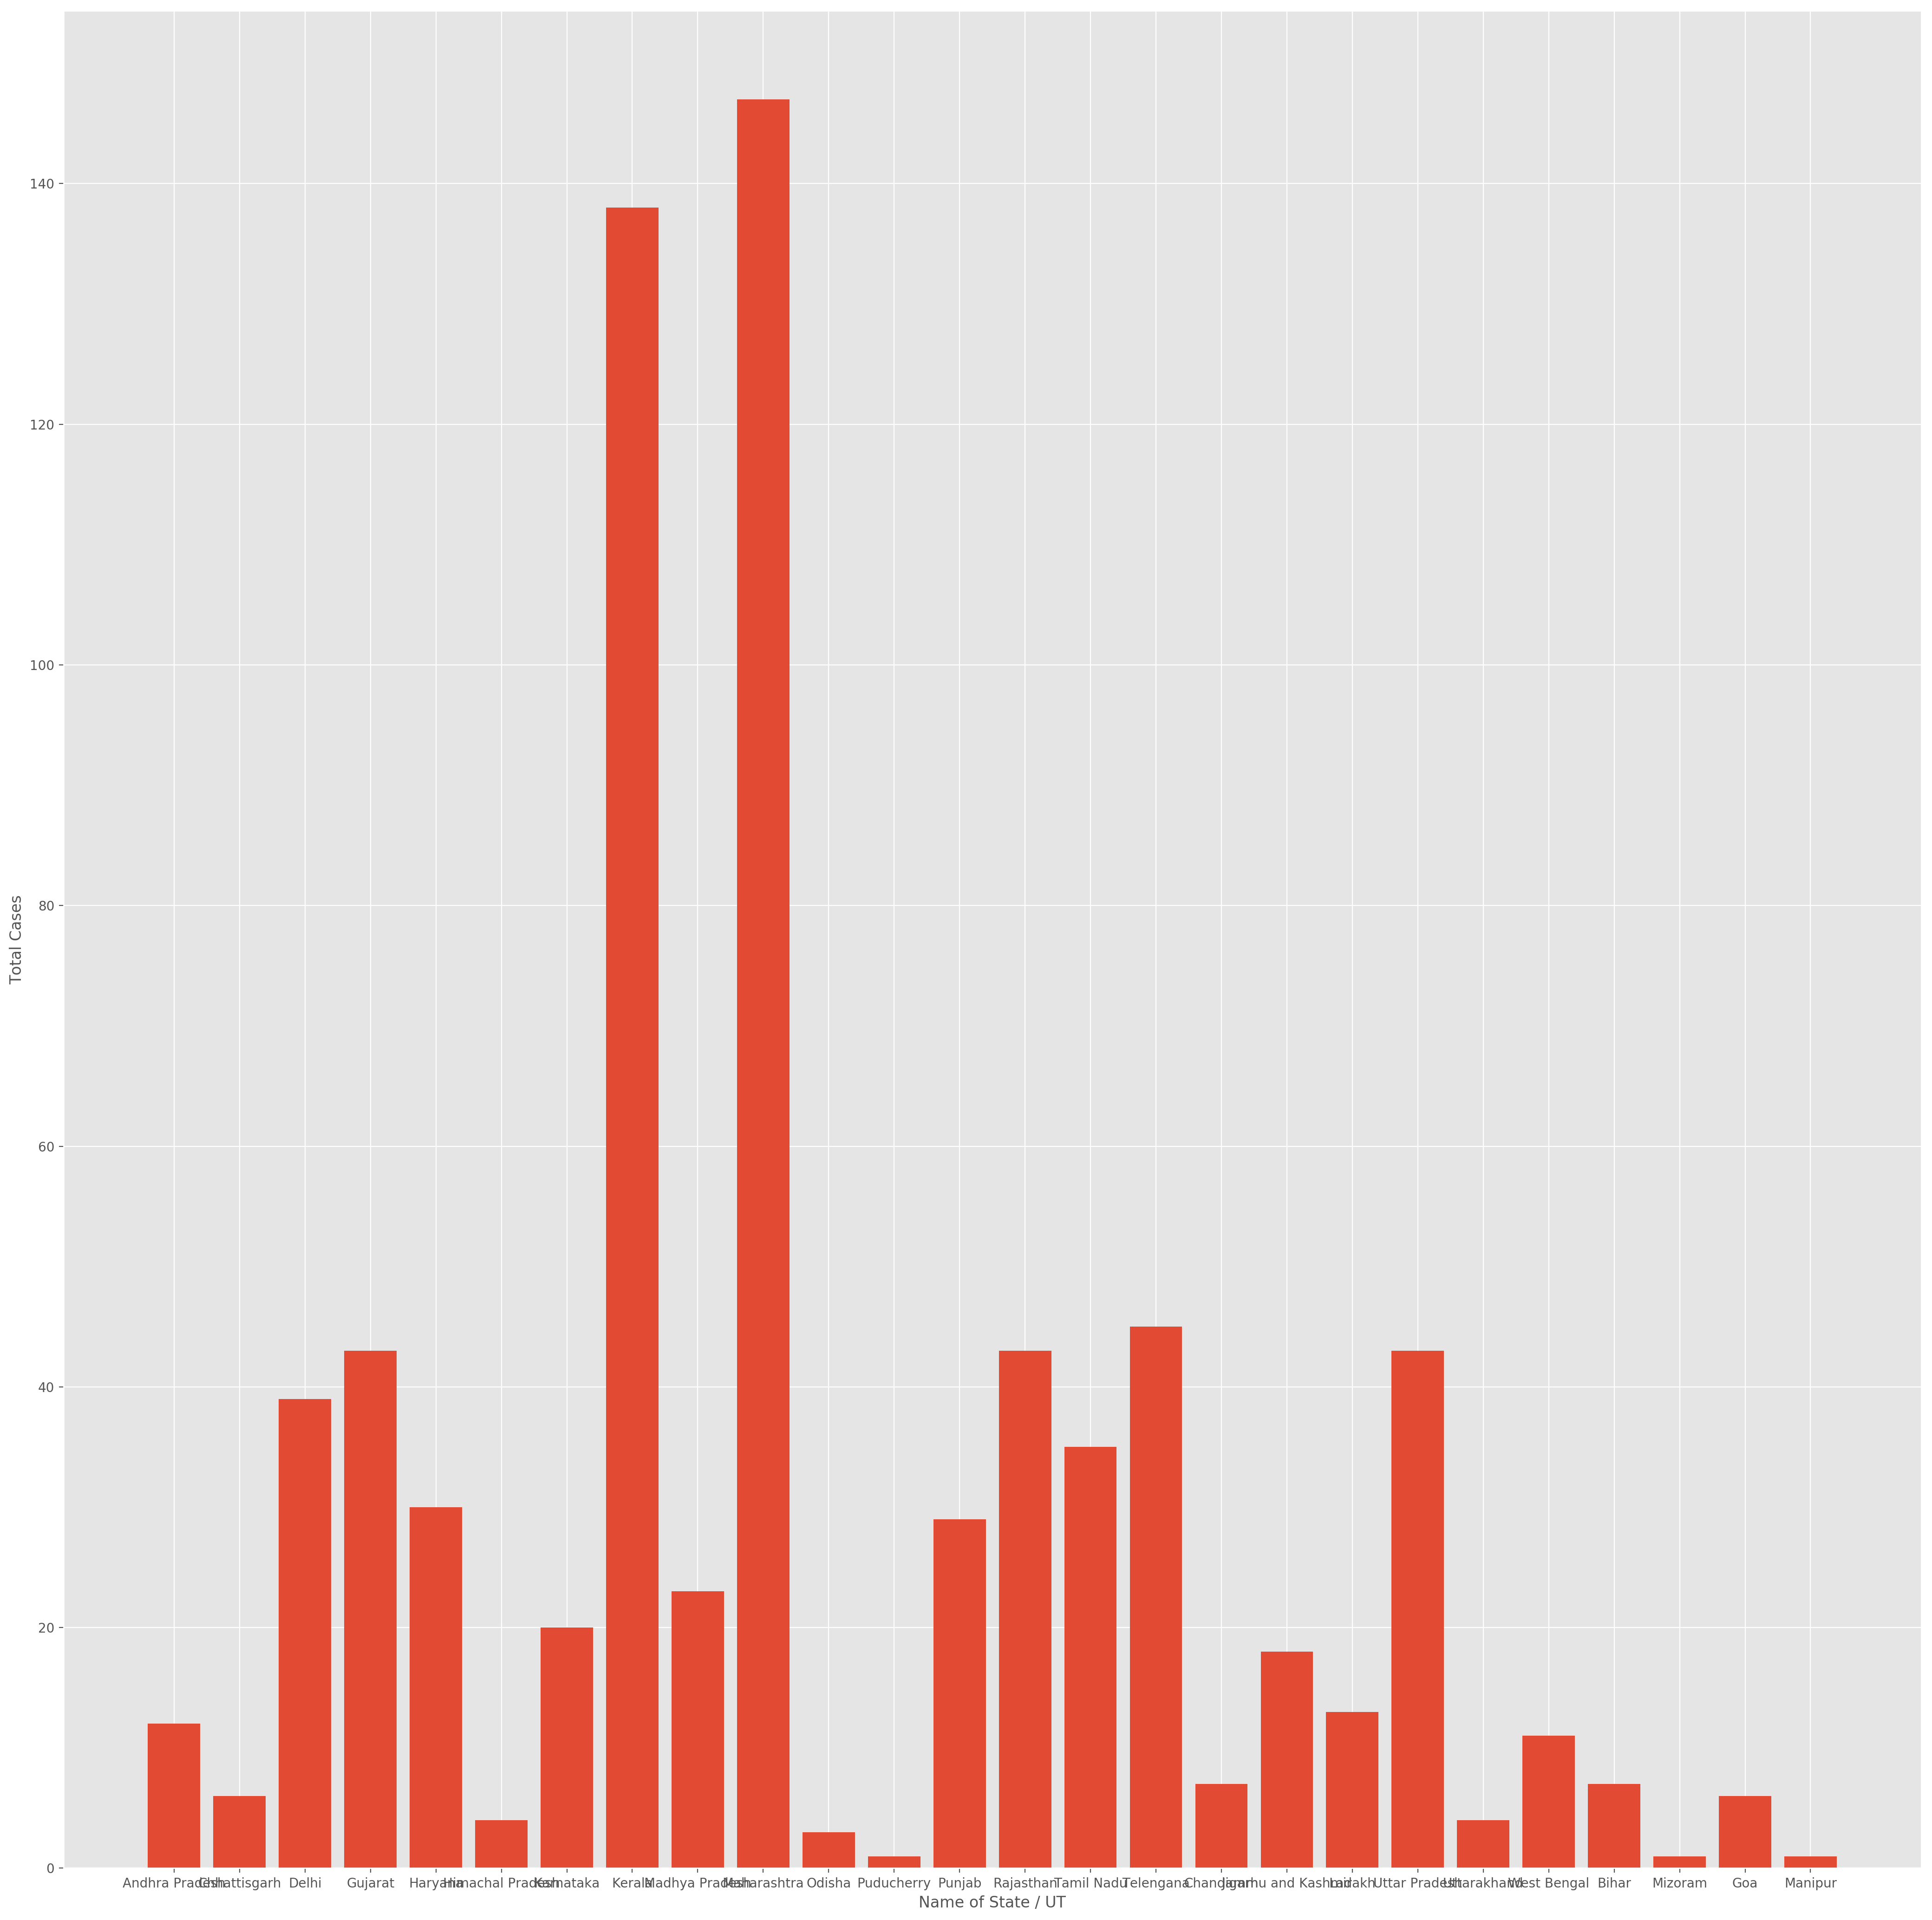

In [100]:
#object oriented visualization 
#matplotlib
fig=plt.figure(figsize=(20,20),dpi=200)  #dotperinches-how many pixel the fig comprises
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title=("Total Cases In India")
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Total Cases')
#creation of bargraph using matplotlib using object oriented method
plt.show()
#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))

In [101]:
Indian_cord=pd.read_excel(r'C:\Users\Admin\Desktop\Indian Coordinates.xlsx')

In [102]:
Indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [112]:
#mergering two data frames
df_full=pd.merge(Indian_cord,df,on='Name of State / UT')

In [113]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [117]:
#folium lib is used to create map

map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')
for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.5,popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>''<strong>Total Cases</strong>:'+str(value)+'<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [118]:
map

# How corona virus is rising globally


In [123]:
dbd_India=pd.read_excel(r'C:\Users\Admin\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy=pd.read_excel(r'C:\Users\Admin\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Korea=pd.read_excel(r'C:\Users\Admin\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Wuhan=pd.read_excel(r'C:\Users\Admin\Desktop\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\COVID-19-Time-Series-Forecasting-with-Data-Analysis-master\per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\io\excel.py:520: UserWarning:

The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.



In [124]:
dbd_India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


In [125]:
dbd_Italy

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN
5,2020-02-05,2,0,NaN
6,2020-02-06,3,1,NaN
7,2020-02-07,3,0,NaN
8,2020-02-08,3,0,NaN
9,2020-02-09,3,0,NaN


In [126]:
dbd_Korea

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN
5,2020-01-25,2,0,NaN
6,2020-01-26,3,1,NaN
7,2020-01-27,4,1,NaN
8,2020-01-28,4,0,NaN
9,2020-01-29,4,0,NaN


In [127]:
dbd_Wuhan

,Date,Total Cases,New Cases
0,2020-01-22,444,0
1,2020-01-23,444,0
2,2020-01-24,549,105
3,2020-01-25,761,212
4,2020-01-26,1058,297
5,2020-01-27,1423,365
6,2020-01-28,3554,2131
7,2020-01-29,3554,0
8,2020-01-30,4903,1349
9,2020-01-31,5806,903


In [134]:
#anlysing total no. of cases day by day
fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [135]:
fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()


In [136]:
fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()

In [137]:
fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

In [138]:
#Scatterplot
fig=px.scatter(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()

In [139]:
#plotly
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [158]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Cumulative cases in India,S.korea,Wuhan,Italy

In [152]:
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [159]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{"colspan": 2}, None]], subplot_titles=("S.Korea","Italy"))
fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'], marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'], marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")), 1, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()